# Clasificación de sonido con Keras

## Dataset

Este conjunto de datos contiene los discursos de estos líderes prominentes; Benjamín Netanyahu, Jens Stoltenberg, Julia Gillard, Margaret
Tacher y Nelson Mandela que también representa los nombres de las carpetas. Cada audio de la carpeta es un PCM de un segundo de duración con una velocidad de muestreo de 16000 hz codificado.
Una carpeta llamada background_noise contiene audios que no son discursos, pero que se pueden encontrar en el interior alrededor del entorno del orador, por ejemplo, la audiencia riendo o aplaudiendo. Se puede mezclar con el discurso mientras se entrena.

### Referencias

https://www.kaggle.com/kongaevans/speaker-recognition-dataset/

## Enunciado

El objetivo del ejercicio consiste en utilizar un perceptrón multicapa para la identificación de la persona que se encuentra hablando a partir de un audio de un segundo de duración.

In [1]:
# Definimos un conjunto de constantes con las rutas de las carpetas que contienen los audios de cada persona
import os

DATASET_ROOT = "/Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_pcm_speeches/16000_pcm_speeches"
BENJAMIN_DATA = os.path.join(DATASET_ROOT, "Benjamin_Netanyau")
JENS_DATA = os.path.join(DATASET_ROOT, "Jens_Stoltenberg")
JULIA_DATA = os.path.join(DATASET_ROOT, "Julia_Gillard")
MARGARET_DATA = os.path.join(DATASET_ROOT, "Magaret_Tarcher")
NELSON_DATA = os.path.join(DATASET_ROOT, "Nelson_Mandela")

# 1. Preparación del conjunto de datos

In [9]:
# Definimos una función para parsear nuestro conjunto de datos
import librosa
import numpy as np

def parse_dataset(dataset_paths):
    X = []
    y = []
    for index, dataset in enumerate(dataset_paths):
        print("[+] Parsing {} data...".format(dataset))
        for fname in os.listdir(dataset):
            wav, sr = librosa.load(os.path.join(dataset, fname), sr=None)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
            X.append(D)
            y.append(index)
    return (X, y)

In [10]:
X, y = parse_dataset([BENJAMIN_DATA, JENS_DATA, JULIA_DATA, MARGARET_DATA, NELSON_DATA])

[+] Parsing /Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_pcm_speeches/16000_pcm_speeches\Benjamin_Netanyau data...
[+] Parsing /Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_pcm_speeches/16000_pcm_speeches\Jens_Stoltenberg data...
[+] Parsing /Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_pcm_speeches/16000_pcm_speeches\Julia_Gillard data...
[+] Parsing /Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_pcm_speeches/16000_pcm_speeches\Magaret_Tarcher data...
[+] Parsing /Users/Luis Antonio Garza/Machine_Learning/curso_deeplearning/notebooks_curso/Clasificación+de+audio+con+el+Perceptrón+Multicapa+I.ipynb/16000_

In [11]:
X

[array([[-63.416656, -58.466927, -57.866516, ..., -40.770134, -50.994156,
         -48.91342 ],
        [-65.237724, -63.087532, -63.86216 , ..., -42.48654 , -44.653687,
         -47.564865],
        [-70.644196, -80.      , -80.      , ..., -49.409775, -51.90255 ,
         -52.380585],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -73.1114  ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -73.09766 ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -73.447334]], dtype=float32),
 array([[-80.      , -79.75411 , -80.      , ..., -56.911243, -55.987465,
         -55.331253],
        [-80.      , -80.      , -77.939224, ..., -52.074   , -54.931946,
         -53.320465],
        [-80.      , -76.83023 , -73.0702  , ..., -54.67077 , -49.203243,
         -47.057365],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -76.22385 

In [12]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# 2. División del conjunto de datos

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [15]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  6750
Longitud subconjunto de validación:  376
Longitud subconjunto de pruebas:  375


# 3. Construcción del modelo

In [16]:
from tensorflow.keras.utils import to_categorical

def prep_dataset(X, y, shape):
    X_prep = np.array(X).reshape((len(X), shape))
    X_prep = X_prep.astype('float32') / 255
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

In [17]:
X_train_prep, y_train_prep = prep_dataset(X_train, y_train, 1025*32)
X_val_prep, y_val_prep = prep_dataset(X_val, y_val, 1025*32)
X_test_prep, y_test_prep = prep_dataset(X_test, y_test, 1025*32)


In [18]:
X_train_prep

array([[-0.16761109, -0.1757897 , -0.2231989 , ..., -0.3137255 ,
        -0.30082792, -0.27292666],
       [-0.13851225, -0.14694744, -0.1852621 , ..., -0.3137255 ,
        -0.29134724, -0.2500111 ],
       [-0.1902109 , -0.1730691 , -0.18237883, ..., -0.30863383,
        -0.25478444, -0.22164291],
       ...,
       [-0.13037394, -0.13407312, -0.17328861, ..., -0.3137255 ,
        -0.281902  , -0.25122133],
       [-0.12274246, -0.14077881, -0.20010673, ..., -0.3137255 ,
        -0.3137255 , -0.2929764 ],
       [-0.21964465, -0.2604785 , -0.26429468, ..., -0.3137255 ,
        -0.26643834, -0.22771852]], dtype=float32)

In [19]:
y_train_prep # valor del vector segun la posicion es la persona correspondiente el audio

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

# 3.1 Entrenamiento de una RNA sencilla

In [21]:
# Entrenamos una perceptrón multicapa
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver = 'sgd')
clf.fit(X_train_prep, y_train)

C:\DataSciencePython\envs\curso_deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [22]:
# Realizamos la predicción con el conjunto de datos de validación
y_pred = clf.predict(X_val_prep)

In [23]:
# Mostramos el accuracy resultante de la clasificación
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.949468085106383

# 3.2 Entrenamiento de una RNA profunda

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [25]:
network = models.Sequential()

network.add(layers.Dense(300, activation = 'relu', input_shape = (1025*32,)))
network.add(layers.Dense(200, activation ='relu'))
network.add(layers.Dense(100, activation ='relu'))
network.add(layers.Dense(5, activation ='softmax'))


In [26]:
network.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy', 'Precision'])

In [27]:
history = network.fit(X_train_prep, y_train_prep, epochs = 30, validation_data = (X_val_prep, y_val_prep))

Epoch 1/30
211/211 [==============================] - 12s 53ms/step - loss: 1.3729 - accuracy: 0.3898 - precision: 0.7123 - val_loss: 1.4907 - val_accuracy: 0.3112 - val_precision: 0.5682
Epoch 2/30
211/211 [==============================] - 10s 46ms/step - loss: 1.0399 - accuracy: 0.5532 - precision: 0.7485 - val_loss: 1.1036 - val_accuracy: 0.4947 - val_precision: 0.5565
Epoch 3/30
211/211 [==============================] - 10s 49ms/step - loss: 0.8416 - accuracy: 0.6581 - precision: 0.7842 - val_loss: 0.8793 - val_accuracy: 0.6277 - val_precision: 0.6667
Epoch 4/30
211/211 [==============================] - 15s 70ms/step - loss: 0.7183 - accuracy: 0.7130 - precision: 0.7850 - val_loss: 0.6820 - val_accuracy: 0.7367 - val_precision: 0.7841
Epoch 5/30
211/211 [==============================] - 14s 66ms/step - loss: 0.6305 - accuracy: 0.7609 - precision: 0.8205 - val_loss: 0.6716 - val_accuracy: 0.7207 - val_precision: 0.7477
Epoch 6/30
211/211 [==============================] - 14s 66

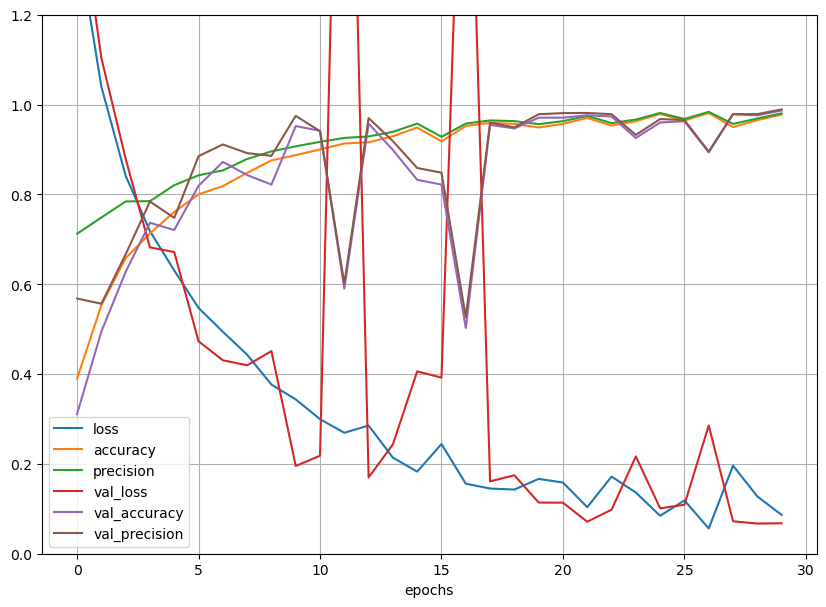

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

# 3.3 Predicción de nuevos ejemplos

In [30]:
# Realizamos la predicción para el subconjunto de pruebas
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

12/12 [==============================] - 0s 14ms/step - loss: 0.1039 - accuracy: 0.9680 - precision: 0.9757


In [31]:
print("test_acc:", test_acc)
print("test_prec:", test_prec)

test_acc: 0.9679999947547913
test_prec: 0.9757412672042847
